In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

C:\Users\Manager\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df=pd.read_csv("iris.data",header=None)

In [3]:
df.columns=['sepal_lenth','sepal_width','petal_length','petal_width','species']

In [4]:
df

,sepal_lenth,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
df['species'] = labelencoder.fit_transform(df['species'])
df

,sepal_lenth,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [6]:
A=df.iloc[:,0:4]

In [7]:
A

,sepal_lenth,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
from sklearn.preprocessing import StandardScaler
A_scaled = StandardScaler().fit_transform(A)
A_scaled[:4]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673]])

In [9]:
features = A_scaled.T
covariance_matrix = np.cov(features)
covariance_matrix[:4]

array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

In [10]:
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
eigen_values[:5]
eigen_vectors

array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
       [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
       [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
       [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]])

In [11]:
eigen_vectors[:5]

array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
       [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
       [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
       [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]])

In [12]:
eigen_vectors.T

array([[ 0.52237162, -0.26335492,  0.58125401,  0.56561105],
       [-0.37231836, -0.92555649, -0.02109478, -0.06541577],
       [-0.72101681,  0.24203288,  0.14089226,  0.6338014 ],
       [ 0.26199559, -0.12413481, -0.80115427,  0.52354627]])

In [13]:
#we will use only first two eigen value becaise it cover more than 95% variance of the dataset.

In [14]:
pc_1 = A_scaled.dot(eigen_vectors.T[0])
pc_2 = A_scaled.dot(eigen_vectors.T[1])
new_df = pd.DataFrame(pc_1, columns=['PC1'])
new_df['PC2'] = pc_2
new_df['Y'] = df['species']
new_df.head()


,PC1,PC2,Y
0,-2.264542,-0.505704,0
1,-2.086426,0.655405,0
2,-2.367950,0.318477,0
3,-2.304197,0.575368,0
4,-2.388777,-0.674767,0


In [15]:
# # x2=np.array(new_df[:,0:2])
# # x1 = new_df['PC1'].dot(eigen_vectors[0])
# # #x2=pc_2.dot(eigen_vectors[1])
# f=new_df.iloc[:,0:2].values
# f
# eigen_vectors[0:2]
# g=f.dot(eigen_vectors[0:2])
# l2=np.linalg.norm(A_scaled-g)
# l2

28.684211116843212

(150, 4)

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

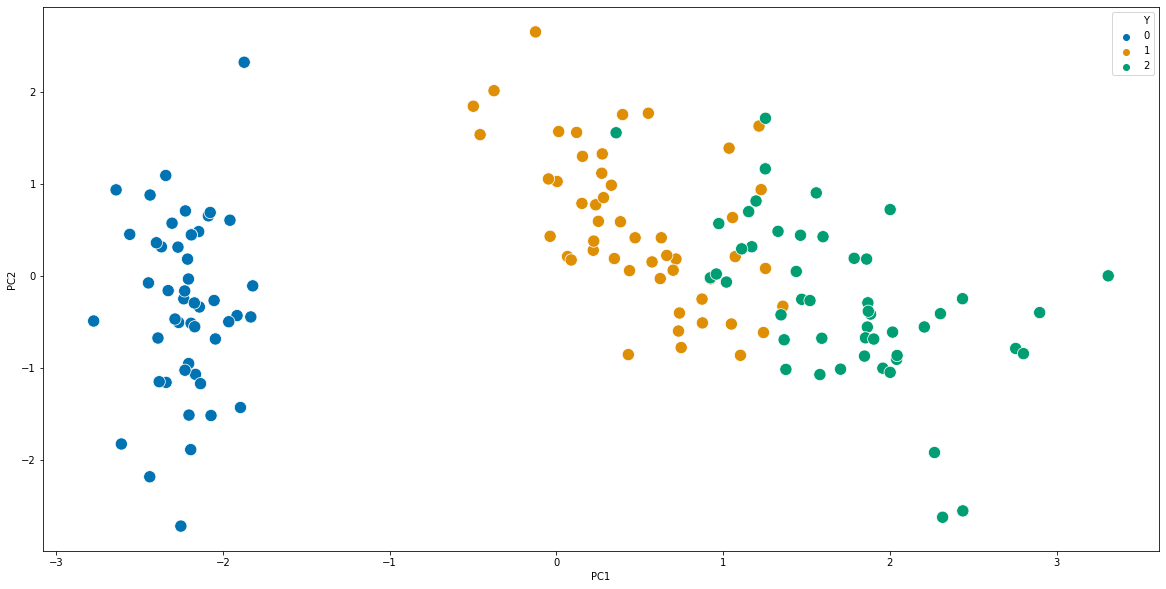

In [17]:
plt.figure(figsize=(20, 10))
sns.scatterplot(new_df['PC1'],new_df['PC2'] , hue=new_df['Y'], s=150,palette='colorblind')


In [18]:
#spectral clustring

In [19]:
new_df1=new_df.iloc[:,0:2]

In [20]:
new_df1

,PC1,PC2
0,-2.264542,-0.505704
1,-2.086426,0.655405
2,-2.367950,0.318477
3,-2.304197,0.575368
4,-2.388777,-0.674767
...,...,...
145,1.870522,-0.382822
146,1.558492,0.905314
147,1.520845,-0.266795
148,1.376391,-1.016362


In [21]:
#Clustring after the PCA

In [22]:
from sklearn.cluster import SpectralClustering
spectral_model_nn = SpectralClustering(n_clusters = 3, affinity ='nearest_neighbors',random_state=345)

In [23]:
labels_nn = spectral_model_nn.fit_predict(new_df1)

In [24]:
labels_nn

array([0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0,
       0, 2, 0, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [25]:
# from sklearn.metrics import silhouette_score
# acc=silhouette_score(A, labels_nn)
# acc

new_df['output']=labels_nn.tolist()

new_df

,PC1,PC2,Y,output
0,-2.264542,-0.505704,0,0
1,-2.086426,0.655405,0,2
2,-2.367950,0.318477,0,2
3,-2.304197,0.575368,0,2
4,-2.388777,-0.674767,0,0
...,...,...,...,...
145,1.870522,-0.382822,2,1
146,1.558492,0.905314,2,1
147,1.520845,-0.266795,2,1
148,1.376391,-1.016362,2,1


In [26]:
d=new_df[new_df['Y']==new_df['output']]
#accuracy of spectral clsutring after the implementation of PCA
acc=len(d)/150
print("accuracy of spectral clsutring after the implementation of PCA: {}".format(acc*100))

accuracy of spectral clsutring after the implementation of PCA: 54.666666666666664


In [27]:
#clustring before pca


In [28]:
from sklearn.cluster import SpectralClustering
spectral_model_nn = SpectralClustering(n_clusters = 3, affinity ='nearest_neighbors',random_state=345)
labels_next = spectral_model_nn.fit_predict(A_scaled)

In [29]:
labels_next

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2,
       1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [30]:
df['output']=labels_next.tolist()

df

,sepal_lenth,sepal_width,petal_length,petal_width,species,output
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,2,2
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2


In [31]:
b=df[df['species']==df['output']]
#accuracy of spectral clsutring before the implementation of PCA
ac=len(b)/150
print("accuracy of spectral clsutring before the implementation of PCA: {}".format(ac*100))

accuracy of spectral clsutring before the implementation of PCA: 72.0


In [32]:
#Reconstructional error


In [33]:
#for k=1

pc_k1 = A_scaled.dot(eigen_vectors.T[0])
df_k1 = pd.DataFrame(pc_k1, columns=['PC1'])

arr_k1=df_k1.values
arr_k1.shape
k_1=arr_k1.dot(eigen_vectors[0:1])
l2_k1=np.linalg.norm(A_scaled-k_1)
print("reconstruction error for k=1: {}".format(l2_k1))

reconstruction error for k=1: 30.810432300287662


In [34]:
#k=2
pc1_k2 = A_scaled.dot(eigen_vectors.T[0])
pc2_k2 = A_scaled.dot(eigen_vectors.T[1])
df_k2 = pd.DataFrame(pc1_k2, columns=['PC1'])
df_k2['PC2'] = pc2_k2
arr_k2=df_k2.values
arr_k2.shape
k_2=arr_k2.dot(eigen_vectors[0:2])
l2_k2=np.linalg.norm(A_scaled-k_2)
print("reconstruction error for k=2: {}".format(l2_k2))

reconstruction error for k=2: 28.684211116843212


In [35]:
#K=3

pc1_k3 = A_scaled.dot(eigen_vectors.T[0])
pc2_k3 = A_scaled.dot(eigen_vectors.T[1])
pc3_k3 = A_scaled.dot(eigen_vectors.T[2])
df_k3 = pd.DataFrame(pc1_k3, columns=['PC1'])
df_k3['PC2'] = pc2_k3
df_k3['PC3'] = pc3_k3
arr_k3=df_k3.values
arr_k3.shape
k_3=arr_k3.dot(eigen_vectors[0:3])
l2_k3=np.linalg.norm(A_scaled-k_3)
print("reconstruction error for k=3: {}".format(l2_k3))

reconstruction error for k=3: 29.752448503458947
